In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.formula.api as smf 

# Reading data

In [196]:

data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data.head(5)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [197]:
data.shape

(42, 2)

In [198]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


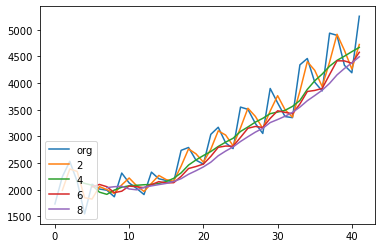

In [199]:
# moving average for the time series to understand better about the trend character in Amtrak
data.Sales.plot(label="org")
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)


In [200]:
t = pd.DataFrame({ 't' : range(1, 43 ,1)})
t

,t
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [201]:
data = pd.concat([data, t], axis= 1)


In [202]:
data

,Quarter,Sales,t
0,Q1_86,1734.827000,1
1,Q2_86,2244.960999,2
2,Q3_86,2533.804993,3
3,Q4_86,2154.962997,4
4,Q1_87,1547.818996,5
5,Q2_87,2104.411995,6
6,Q3_87,2014.362999,7
7,Q4_87,1991.746998,8
8,Q1_88,1869.049999,9
9,Q2_88,2313.631996,10


In [203]:
data['t_square'] = data['t']**2

In [204]:
data 

,Quarter,Sales,t,t_square
0,Q1_86,1734.827000,1,1
1,Q2_86,2244.960999,2,4
2,Q3_86,2533.804993,3,9
3,Q4_86,2154.962997,4,16
4,Q1_87,1547.818996,5,25
5,Q2_87,2104.411995,6,36
6,Q3_87,2014.362999,7,49
7,Q4_87,1991.746998,8,64
8,Q1_88,1869.049999,9,81
9,Q2_88,2313.631996,10,100


In [205]:
data.isnull().sum()

Quarter     0
Sales       0
t           0
t_square    0
dtype: int64

In [206]:
data.dtypes

Quarter      object
Sales       float64
t             int64
t_square      int64
dtype: object

In [207]:
sales = data['Sales']
sales

0     1734.827000
1     2244.960999
2     2533.804993
3     2154.962997
4     1547.818996
5     2104.411995
6     2014.362999
7     1991.746998
8     1869.049999
9     2313.631996
10    2128.320000
11    2026.828999
12    1910.603996
13    2331.164993
14    2206.549995
15    2173.967995
16    2148.278000
17    2739.307999
18    2792.753998
19    2556.009995
20    2480.973999
21    3039.522995
22    3172.115997
23    2879.000999
24    2772.000000
25    3550.000000
26    3508.000000
27    3243.859993
28    3056.000000
29    3899.000000
30    3629.000000
31    3373.000000
32    3352.000000
33    4342.000000
34    4461.000000
35    4017.000000
36    3854.000000
37    4936.000000
38    4895.000000
39    4333.000000
40    4194.000000
41    5253.000000
Name: Sales, dtype: float64

In [208]:
sales = np.array(sales, dtype=int)

In [209]:
log_ = np.log(sales)

In [210]:
log = pd.DataFrame(log_)
log.columns = ['log']

In [211]:
data = pd.concat([data, log], axis= 1)

In [212]:
data

,Quarter,Sales,t,t_square,log
0,Q1_86,1734.827000,1,1,7.458186
1,Q2_86,2244.960999,2,4,7.716015
2,Q3_86,2533.804993,3,9,7.837160
3,Q4_86,2154.962997,4,16,7.675082
4,Q1_87,1547.818996,5,25,7.344073
5,Q2_87,2104.411995,6,36,7.651596
6,Q3_87,2014.362999,7,49,7.607878
7,Q4_87,1991.746998,8,64,7.596392
8,Q1_88,1869.049999,9,81,7.533159
9,Q2_88,2313.631996,10,100,7.746301


In [213]:
data['Quarter'] = data['Quarter'].str.replace(r'_',' ')

In [214]:
data[['Quarter','year']] = data.Quarter.str.split(expand=True) 

In [215]:
data

,Quarter,Sales,t,t_square,log,year
0,Q1,1734.827000,1,1,7.458186,86
1,Q2,2244.960999,2,4,7.716015,86
2,Q3,2533.804993,3,9,7.837160,86
3,Q4,2154.962997,4,16,7.675082,86
4,Q1,1547.818996,5,25,7.344073,87
5,Q2,2104.411995,6,36,7.651596,87
6,Q3,2014.362999,7,49,7.607878,87
7,Q4,1991.746998,8,64,7.596392,87
8,Q1,1869.049999,9,81,7.533159,88
9,Q2,2313.631996,10,100,7.746301,88


In [216]:
 x = pd.get_dummies(data, columns=["Quarter"])

In [217]:
data = pd.concat([x, data], axis=1)

In [218]:
data.head(10)

,Sales,t,t_square,log,year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Quarter,Sales,t,t_square,log,year
0,1734.827000,1,1,7.458186,86,1,0,0,0,Q1,1734.827000,1,1,7.458186,86
1,2244.960999,2,4,7.716015,86,0,1,0,0,Q2,2244.960999,2,4,7.716015,86
2,2533.804993,3,9,7.837160,86,0,0,1,0,Q3,2533.804993,3,9,7.837160,86
3,2154.962997,4,16,7.675082,86,0,0,0,1,Q4,2154.962997,4,16,7.675082,86
4,1547.818996,5,25,7.344073,87,1,0,0,0,Q1,1547.818996,5,25,7.344073,87
5,2104.411995,6,36,7.651596,87,0,1,0,0,Q2,2104.411995,6,36,7.651596,87
6,2014.362999,7,49,7.607878,87,0,0,1,0,Q3,2014.362999,7,49,7.607878,87
7,1991.746998,8,64,7.596392,87,0,0,0,1,Q4,1991.746998,8,64,7.596392,87
8,1869.049999,9,81,7.533159,88,1,0,0,0,Q1,1869.049999,9,81,7.533159,88
9,2313.631996,10,100,7.746301,88,0,1,0,0,Q2,2313.631996,10,100,7.746301,88


In [219]:
data = data.T.drop_duplicates().T

In [220]:
data.columns

Index(['Sales', 't', 't_square', 'log', 'year', 'Quarter_Q1', 'Quarter_Q2',
       'Quarter_Q3', 'Quarter_Q4', 'Quarter'],
      dtype='object')

In [259]:
data.dtypes

Sales         float64
t              object
t_square       object
log            object
year           object
Quarter_Q1     object
Quarter_Q2     object
Quarter_Q3     object
Quarter_Q4     object
Quarter        object
dtype: object

In [266]:
  
data[['Sales']] = data[['Sales']].apply(pd.to_numeric)
data[['t']] = data[['t']].apply(pd.to_numeric)
data[['t_square']] = data[['t_square']].apply(pd.to_numeric)
data[['log']] = data[['log']].apply(pd.to_numeric)
data[['year']] = data[['year']].apply(pd.to_numeric)

In [267]:
data.dtypes

Sales         float64
t               int64
t_square        int64
log           float64
year            int64
Quarter_Q1     object
Quarter_Q2     object
Quarter_Q3     object
Quarter_Q4     object
Quarter        object
dtype: object

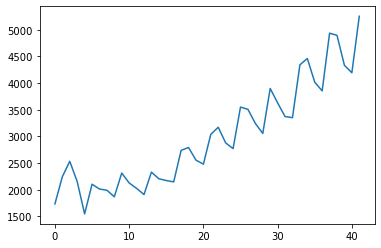

In [269]:
#line plot
data.Sales.plot()

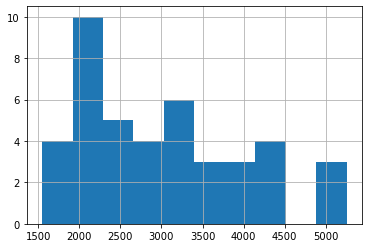

In [270]:
# histogram plot
data.Sales.hist()
plt.show()

<ipython-input-271-13e6210c76da>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(data.Sales,freq=12)


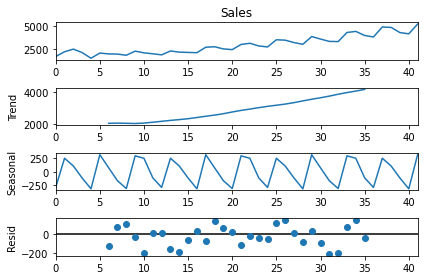

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Sales,freq=12)
decompose_ts_add.plot()
plt.show() 

In [272]:
Train = data.head(30)
Test = data.tail(12)  

In [273]:
#Linear Model

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

714.0144483281299

In [274]:
#Exponential

Exp = smf.ols('log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

552.0467240138624

In [275]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

646.2715428312024

In [276]:
#Additive seasonality 

add_sea = smf.ols('Sales~Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Quarter_Q1', 'Quarter_Q2',
       'Quarter_Q3', 'Quarter_Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941363

In [277]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Quarter_Q1', 'Quarter_Q2',
       'Quarter_Q3', 'Quarter_Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

586.0533067871098

In [278]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log~Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1829.405090357678

In [279]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log~t+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

409.8767020992637

In [280]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,409.876702
1,rmse_Exp,552.046724
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1829.405090


In [281]:
#inference = model 6 is the best model.